Shape: (20000, 27)

Column Names:
 ['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income', 'Potential_Savings_Groceries', 'Potential_Savings_Transport', 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']

Data Types:
 Income                             float64
Age                                  int64
Dependents                           int64
Occupation                          object
City_Tier                           object
Rent                               float64
Loan_Repayment                     float64
Insurance                          float64
Groceries                          float64
Transport               

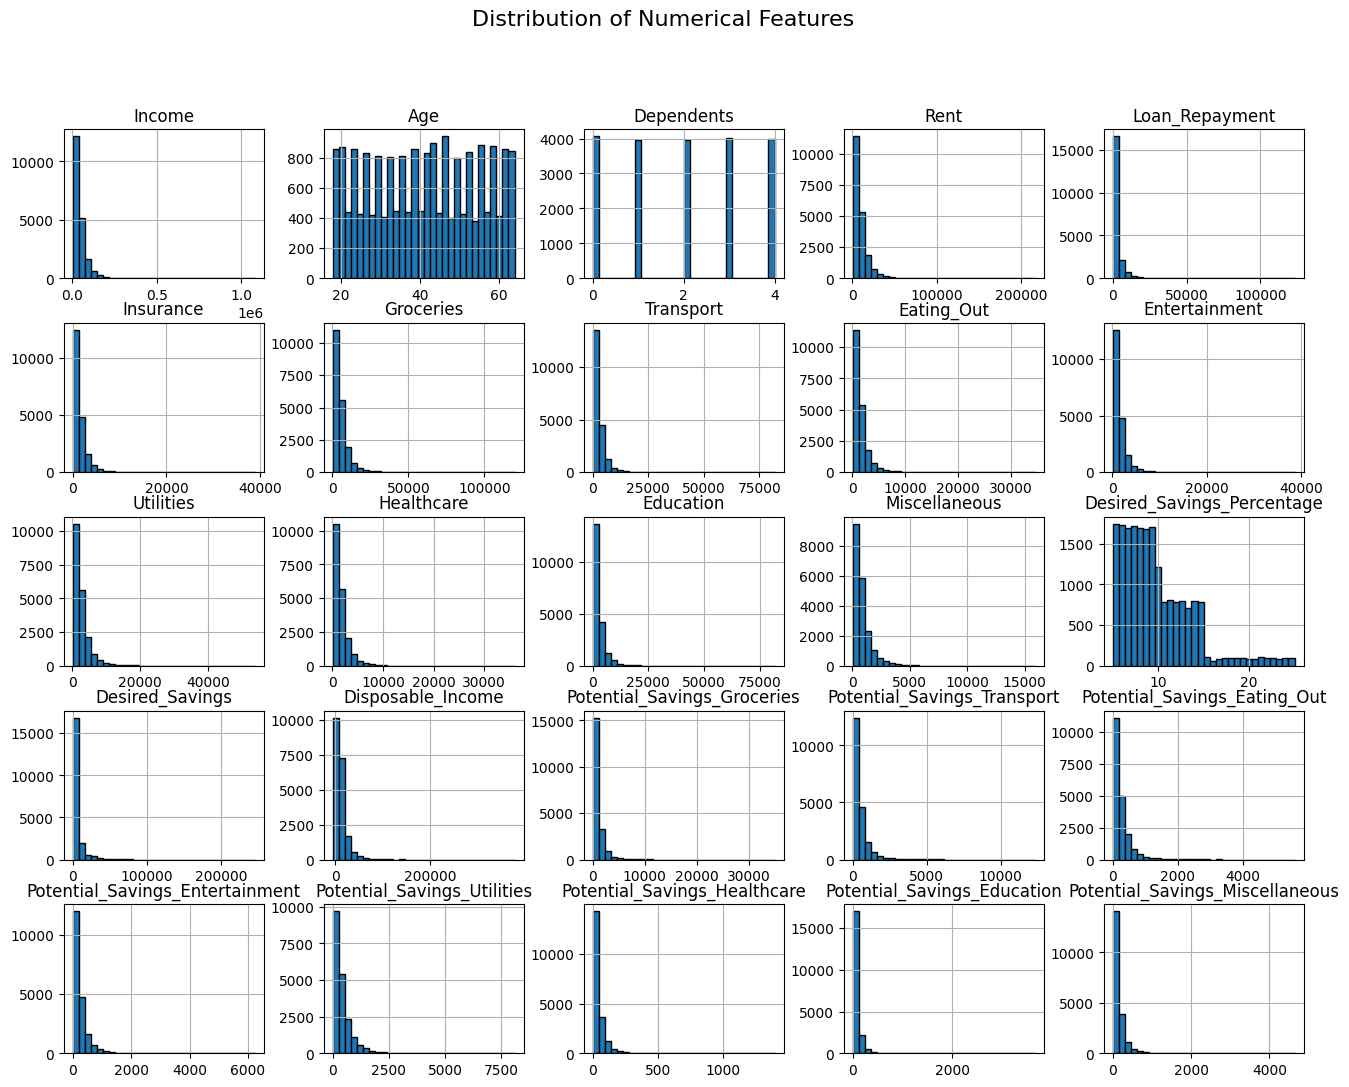

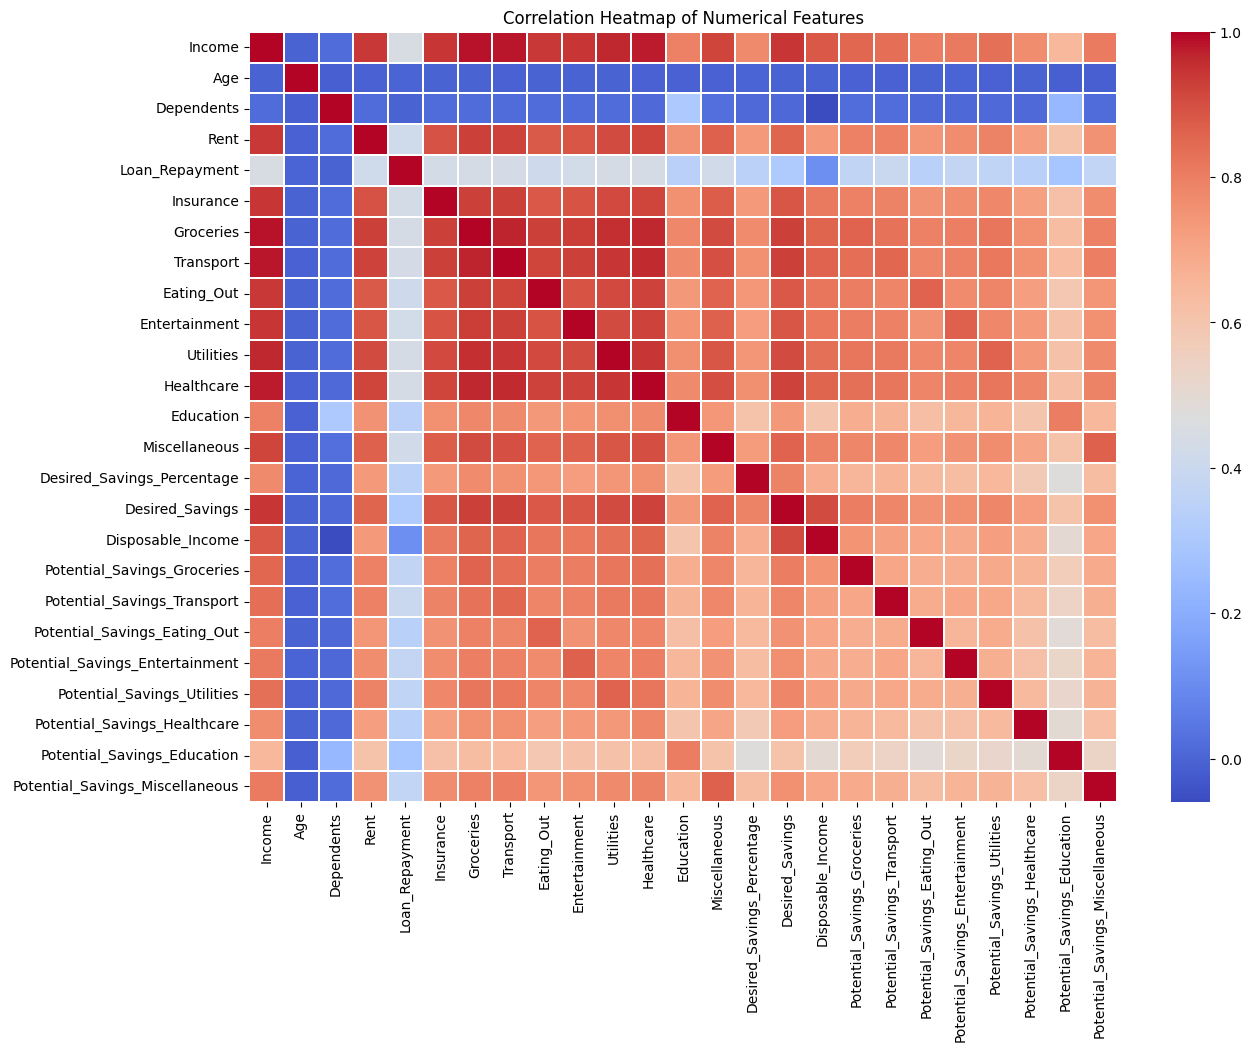

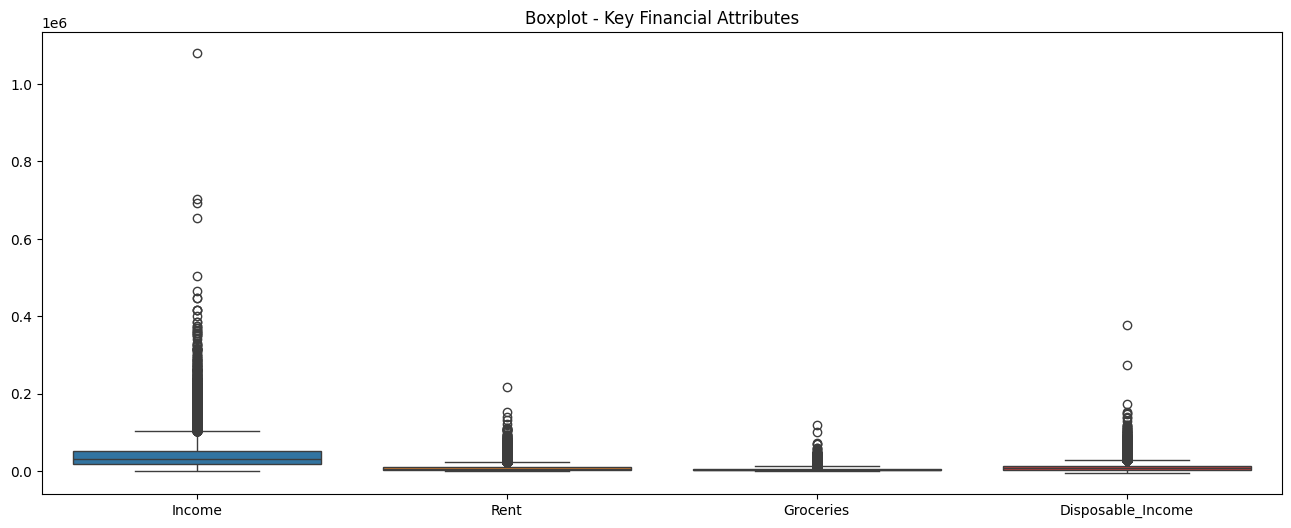

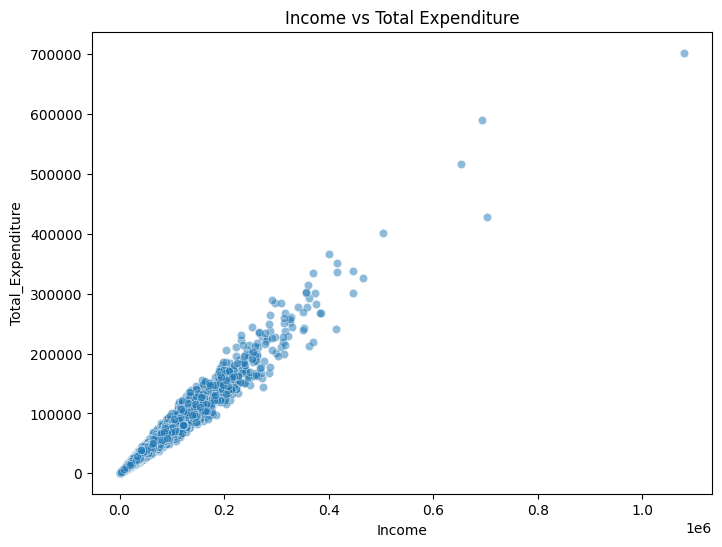

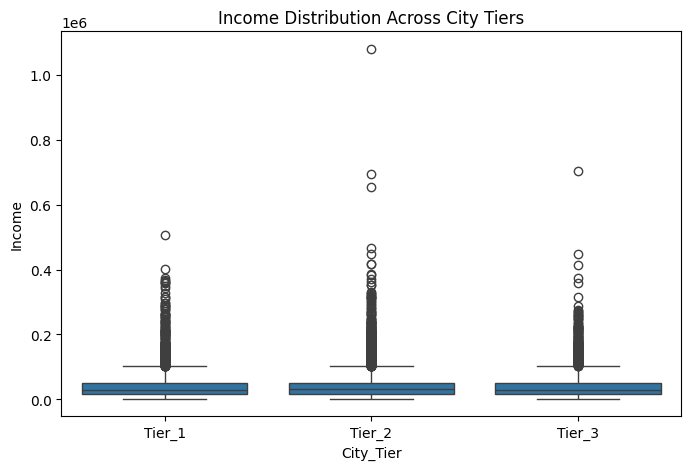

/tmp/ipython-input-459598167.py:66: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Occupation', y='Income', data=df, estimator=np.mean, ci=None)


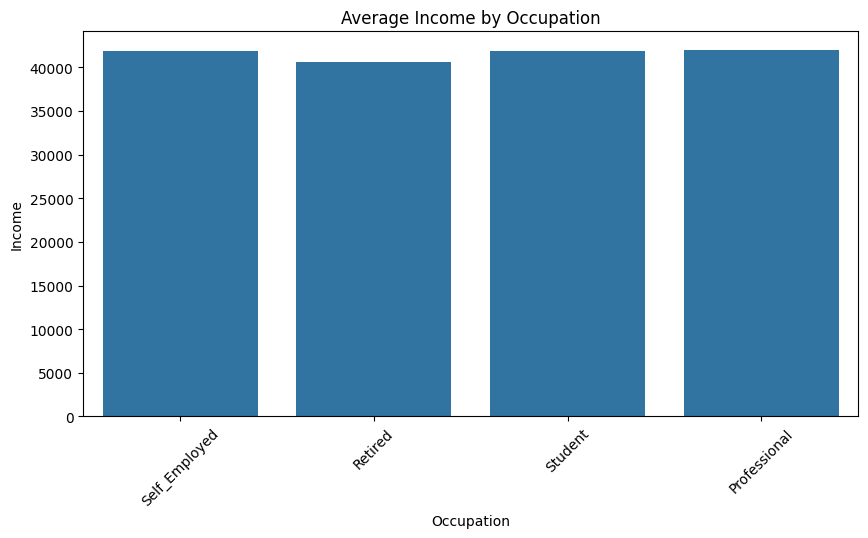

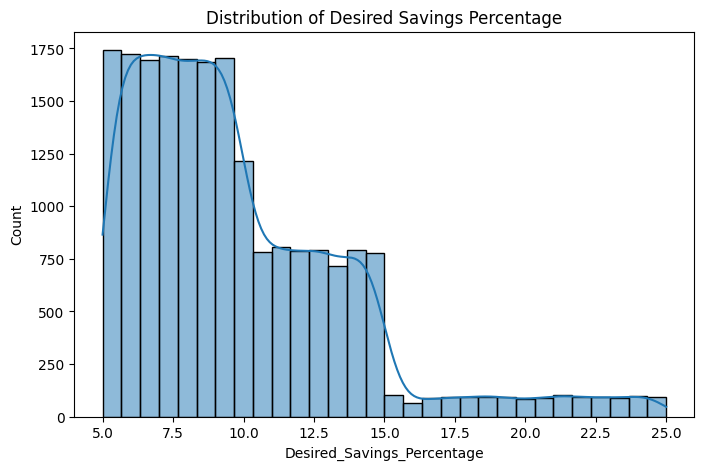

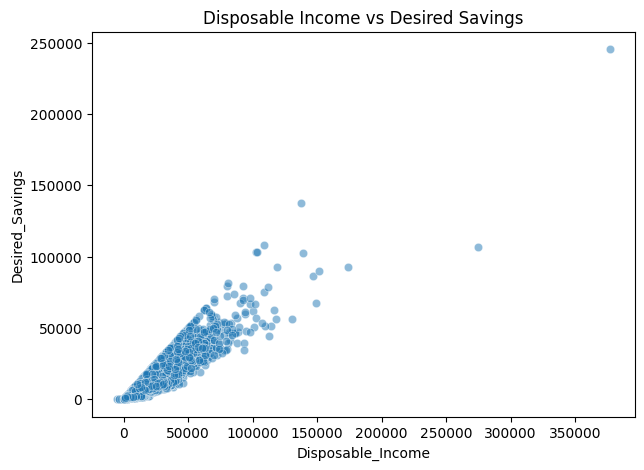

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 🧾 Load dataset
file_path = "data 2.csv"
df = pd.read_csv(file_path)

# 🔍 Basic overview
print("Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# 🧠 Check for null values
print("\nMissing Values:\n", df.isnull().sum())

# 🏷️ Categorical columns
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Columns:", cat_cols.tolist())
print("\nNumerical Columns:", num_cols.tolist())

# 🔢 Distribution of numerical features
df[num_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# 📈 Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df[num_cols].corr(), annot=False, cmap="coolwarm", linewidths=0.3)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 📊 Boxplots for key continuous features
plt.figure(figsize=(16, 6))
sns.boxplot(data=df[num_cols][['Income', 'Rent', 'Groceries', 'Disposable_Income']])
plt.title("Boxplot - Key Financial Attributes")
plt.show()

# 🧮 Income vs Expenditure Relationship
df['Total_Expenditure'] = df[['Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport',
                              'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare',
                              'Education', 'Miscellaneous']].sum(axis=1)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Income', y='Total_Expenditure', data=df, alpha=0.5)
plt.title("Income vs Total Expenditure")
plt.show()

# 🏙️ City Tier vs Income
plt.figure(figsize=(8,5))
sns.boxplot(x='City_Tier', y='Income', data=df)
plt.title("Income Distribution Across City Tiers")
plt.show()

# 👷 Occupation vs Income
plt.figure(figsize=(10,5))
sns.barplot(x='Occupation', y='Income', data=df, estimator=np.mean, ci=None)
plt.xticks(rotation=45)
plt.title("Average Income by Occupation")
plt.show()

# 💰 Savings Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Desired_Savings_Percentage'], bins=30, kde=True)
plt.title("Distribution of Desired Savings Percentage")
plt.show()

# 🧮 Correlation between Disposable Income and Savings
plt.figure(figsize=(7,5))
sns.scatterplot(x='Disposable_Income', y='Desired_Savings', data=df, alpha=0.5)
plt.title("Disposable Income vs Desired Savings")
plt.show()


R² Score: 0.9365625202446576
Mean Absolute Error: 132.89575721450828


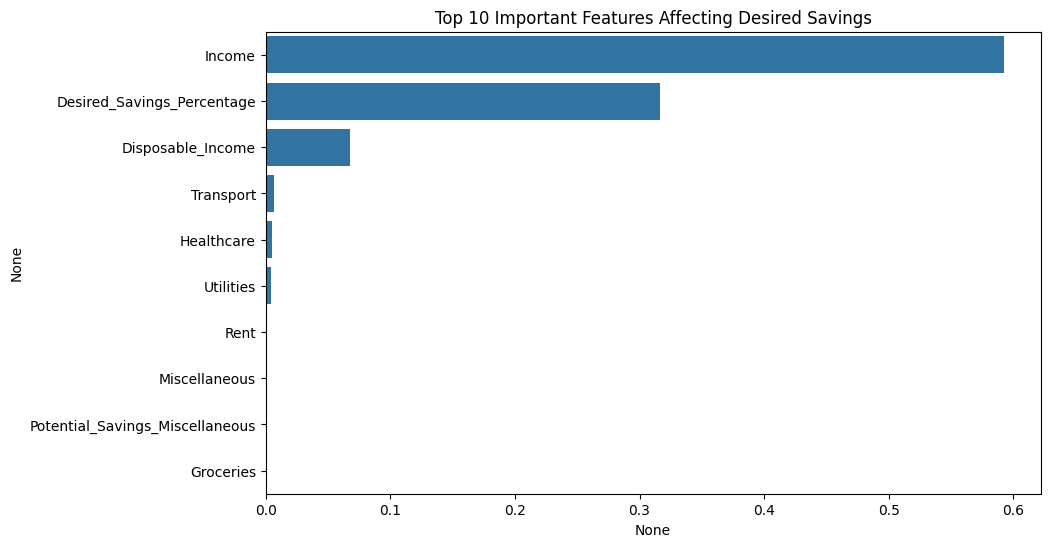

In [ ]:
# ================= REGRESSION MODEL =================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data 2.csv")

# Encode categorical variables
le_occ = LabelEncoder()
le_city = LabelEncoder()
df['Occupation'] = le_occ.fit_transform(df['Occupation'])
df['City_Tier'] = le_city.fit_transform(df['City_Tier'])

# Define features and target
X = df.drop(columns=['Desired_Savings'])
y = df['Desired_Savings']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric data
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

# Feature Importance
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Important Features Affecting Desired Savings")
plt.show()


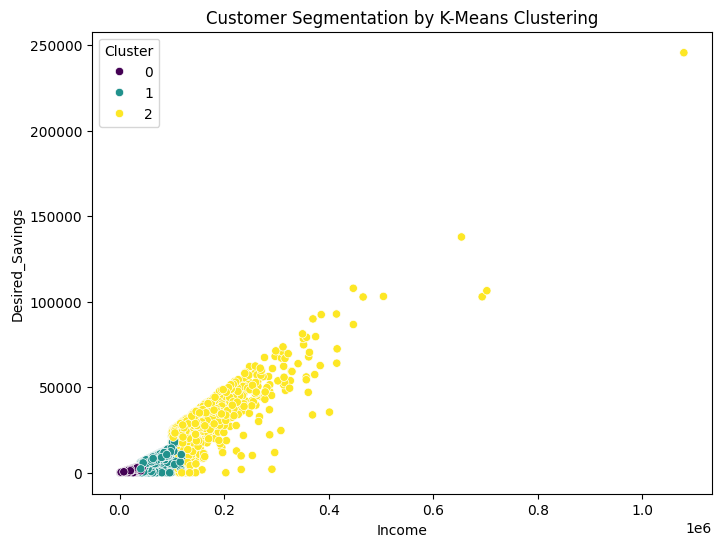


Cluster Summary (Average Values):
                 Income  Disposable_Income  Desired_Savings_Percentage  \
Cluster                                                                 
0         21552.070459        5448.291830                    7.519053   
1         62463.293556       16031.457828                   12.714679   
2        157200.609995       40823.288409                   20.332698   

            Groceries  Entertainment    Education  
Cluster                                            
0         2699.662019     751.546240  1280.466720  
1         7810.098904    2164.240533  3684.002050  
2        19704.279922    5529.944300  9946.882433  


In [ ]:
# ================= CLUSTERING MODEL =================
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("data 2.csv")

# Encode categorical variables
le_occ = LabelEncoder()
le_city = LabelEncoder()
df['Occupation'] = le_occ.fit_transform(df['Occupation'])
df['City_Tier'] = le_city.fit_transform(df['City_Tier'])

# Select key behavioral features for clustering
features = ['Income', 'Disposable_Income', 'Desired_Savings_Percentage',
            'Groceries', 'Entertainment', 'Education']

X = df[features]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='Income', y='Desired_Savings', hue='Cluster', data=df, palette='viridis')
plt.title("Customer Segmentation by K-Means Clustering")
plt.show()

# Cluster Summary
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster Summary (Average Values):\n", cluster_summary)


Dataset shape: (20000, 27)

Columns: ['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income', 'Potential_Savings_Groceries', 'Potential_Savings_Transport', 'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment', 'Potential_Savings_Utilities', 'Potential_Savings_Healthcare', 'Potential_Savings_Education', 'Potential_Savings_Miscellaneous']
Desired_Savings_Percentage in columns? -> True
Desired_Savings in columns? -> True
Saver_Class value counts (including NaNs):
 Saver_Class
Low       6667
High      6667
Medium    6666
Name: count, dtype: int64

Using features (numeric): ['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', '

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:38:34] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Accuracy: 0.9965

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00      1334
         Low       1.00      1.00      1.00      1333
      Medium       0.99      0.99      0.99      1333

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Confusion Matrix:
 [[1331    0    3]
 [   0 1329    4]
 [   5    2 1326]]


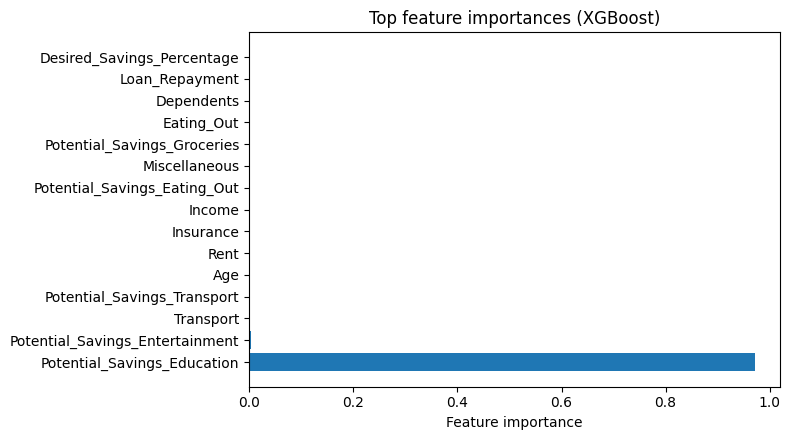

In [ ]:
# Classification fix and run on the provided dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
file_path = "data 2.csv"
df = pd.read_csv(file_path)

# Quick checks
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# Ensure the key columns exist
for col in ["Desired_Savings_Percentage", "Desired_Savings"]:
    print(f"{col} in columns? ->", col in df.columns)

# Fill any missing values in categorical cols (if any)
for c in ["Occupation", "City_Tier"]:
    if c in df.columns:
        df[c] = df[c].fillna("Unknown").astype(str)

# Encode categorical variables
le_occ = LabelEncoder()
le_city = LabelEncoder()
if "Occupation" in df.columns:
    df['Occupation_enc'] = le_occ.fit_transform(df['Occupation'])
if "City_Tier" in df.columns:
    df['City_Tier_enc'] = le_city.fit_transform(df['City_Tier'])

# Create saver category labels robustly (qcut may fail if many identical values)
if "Desired_Savings_Percentage" not in df.columns:
    raise ValueError("Column 'Desired_Savings_Percentage' not found in dataset. Please provide this column to create saver classes.")

try:
    df['Saver_Class'] = pd.qcut(df['Desired_Savings_Percentage'], q=3, labels=['Low', 'Medium', 'High'])
except Exception as e:
    print("pd.qcut failed (likely due to many identical values). Falling back to pd.cut. Error:", e)
    df['Saver_Class'] = pd.cut(df['Desired_Savings_Percentage'], bins=3, labels=['Low', 'Medium', 'High'], include_lowest=True)

# Check for any NaNs in Saver_Class
print("Saver_Class value counts (including NaNs):\n", df['Saver_Class'].value_counts(dropna=False))

# Define features and target
drop_cols = ['Saver_Class']
# Drop original target 'Desired_Savings' only if present (we assume it's a leakage variable)
if 'Desired_Savings' in df.columns:
    drop_cols.append('Desired_Savings')

# We'll use the encoded categorical columns instead of originals
feature_cols = [c for c in df.columns if c not in drop_cols and c not in ['Occupation', 'City_Tier']]
# Keep only numeric columns from feature_cols
X = df[feature_cols].select_dtypes(include=[np.number]).copy()
y = df['Saver_Class'].copy()

print("\nUsing features (numeric):", X.columns.tolist())

# If target has NaNs, drop those rows
mask = y.notna() & X.notna().all(axis=1)
X = X[mask]
y = y[mask]

# Encode target labels to integers
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)

# Train-test split with stratify to keep class balance
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=42, stratify=y_enc)

# Scale numeric features
num_cols = X_train.columns.tolist()
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Train XGBoost classifier
model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)
model.fit(X_train, y_train)

# Predictions & evaluation
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Feature importance plot (matplotlib only)
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
    top_n = min(15, len(feat_imp))
    plt.figure(figsize=(8, max(4, top_n * 0.3)))
    plt.barh(range(top_n)[::-1], feat_imp.values[:top_n][::-1])
    plt.yticks(range(top_n), feat_imp.index[:top_n][::-1])
    plt.xlabel("Feature importance")
    plt.title("Top feature importances (XGBoost)")
    plt.tight_layout()
    plt.show()
else:
    print("Model does not expose feature_importances_.")



In [ ]:
target_col = df.columns[1]   # second column is the target
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# Detect target type and preprocess accordingly
if y.dtype == 'object' or y.nunique() < 10:  # likely classification
    le = LabelEncoder()
    y = le.fit_transform(y)
    num_classes = len(np.unique(y))
    if num_classes > 2:
        y = to_categorical(y)
    output_type = 'classification'
else:
    output_type = 'regression'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

if output_type == 'classification':
    if len(y_train.shape) > 1:  # multi-class
        model.add(Dense(y_train.shape[1], activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    else:  # binary
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
else:  # regression
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on test data
results = model.evaluate(X_test, y_test, verbose=0)

print("\nModel Type:", output_type)
print("Test Results:", results)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 898.8763 - mae: 25.0578 - val_loss: 214.0525 - val_mae: 12.4269
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 239.2456 - mae: 12.9324 - val_loss: 198.2864 - val_mae: 12.0911
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 227.7976 - mae: 12.7183 - val_loss: 198.5414 - val_mae: 12.0838
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 221.4319 - mae: 12.5482 - val_loss: 199.0983 - val_mae: 12.0751
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 215.5110 - mae: 12.3156 - val_loss: 194.1207 - val_mae: 11.9680
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 219.5197 - mae: 12.5072 - val_loss: 192.7924 - val_mae: 11.9468
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 218.6616 - mae: 12.5093 - val_loss: 198.0765 - val_mae: 12.0791
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 217.3679 - mae: 12.4475 - val_loss: 193.7640 - val_mae: 11.9625
Epoch 9/50
400/400 

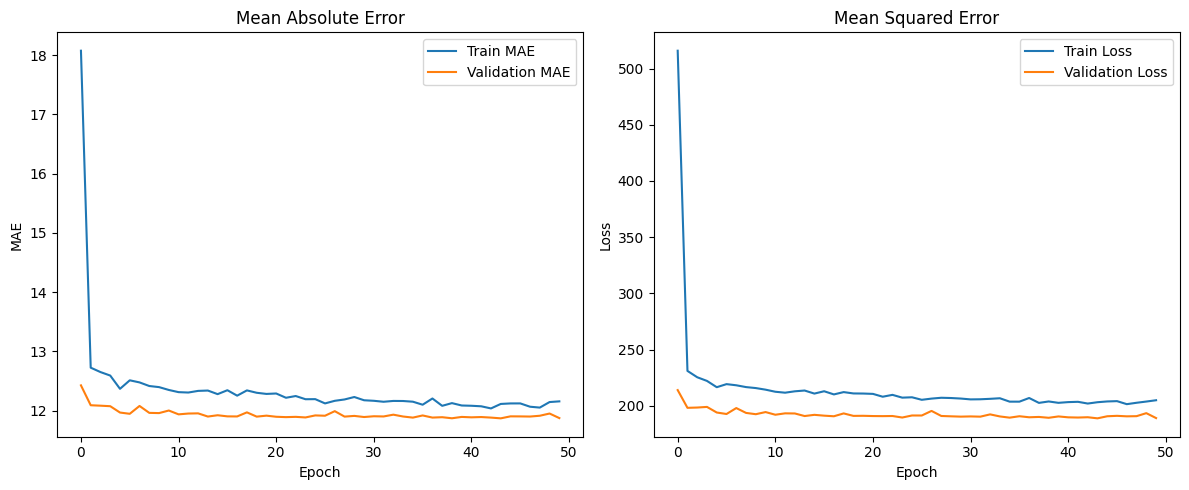

In [ ]:
plt.figure(figsize=(12,5))

# Plot based on model type
if output_type == 'classification':
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

else:  # regression
    # MAE plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    # Loss (MSE) plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Mean Squared Error')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()